# Calcolo delle curve di possibilità pluviometrica con il metodo dei momenti

## Operazioni Preliminari

In [1]:
import os
import math
from pandas import *
import pandas as pd
from datetime import datetime
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
os.getcwd()

'/Users/riccardo/Dropbox/A-Workspace/0-Idrologia/2020/3-Lezione 3 - Gumbel'

In [3]:
os.chdir("/Users/riccardo/Dropbox/A-Data/Paperopoli")

In [4]:
os.listdir()

['abs_mle_right',
 'abs_mle',
 'MeanPrecipitationsOverYears.png',
 'abs_mq',
 'MeanPrecipitationsOverDurations.png',
 'PortataRotiano_gg.png',
 'PluviometriaPaperopoli_4.txt',
 'best_param',
 'abs_m',
 'PluviometriaPaperopoli_2.txt',
 'PluviometriaPaperopoli_3.txt']

In [5]:
data=pd.read_csv('PluviometriaPaperopoli_4.txt')
map(datetime,data['anno'])
data=data.set_index('anno')

In [6]:
data.head()

,1h,3h,6h,12h,24h
anno,,,,,
1925,50.0,NaN,NaN,NaN,NaN
1928,35.0,47.0,50.0,50.4,67.6
1929,35.4,36.4,36.4,49.6,74.0
1930,67.2,68.2,80.8,102.2,106.8
1931,25.2,NaN,NaN,NaN,NaN


In [7]:
means=data.mean()

In [8]:
means

1h     36.912000
3h     45.360000
6h     55.688889
12h    71.324444
24h    89.528889
dtype: float64

Text(0.5, 0, 'Durata [h]')

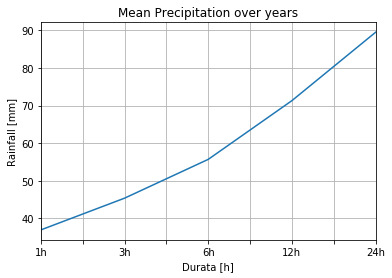

In [9]:
ax=means.plot()
ax.grid()
ax.set_title('Mean Precipitation over years')
ax.set_ylabel("Rainfall [mm]")
ax.set_xlabel('Durata [h]')

Come salvare il grafico su un file esterno di opportuna risoluzione ?

In [10]:
figR=ax.get_figure()
figR.savefig("MeanPrecipitationsOverDurations.png",dpi=300)

## Changing style

Text(0.5, 0, 'Durata [h]')

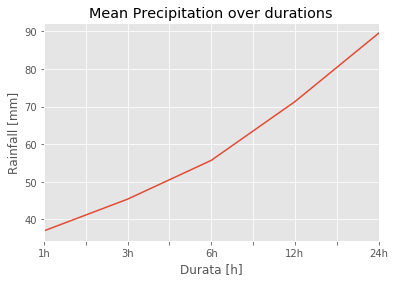

In [11]:
plt.style.use('ggplot')
ax=means.plot()
#ax.grid() #grid() ic conflicting twith ggplot
ax.set_title('Mean Precipitation over durations')
ax.set_ylabel("Rainfall [mm]")
ax.set_xlabel('Durata [h]')

In [12]:
variances=data.var()
variances

1h     158.739853
3h     188.130182
6h     289.751919
12h    551.671434
24h    946.383919
dtype: float64

Text(0.5, 0, 'Durata [h]')

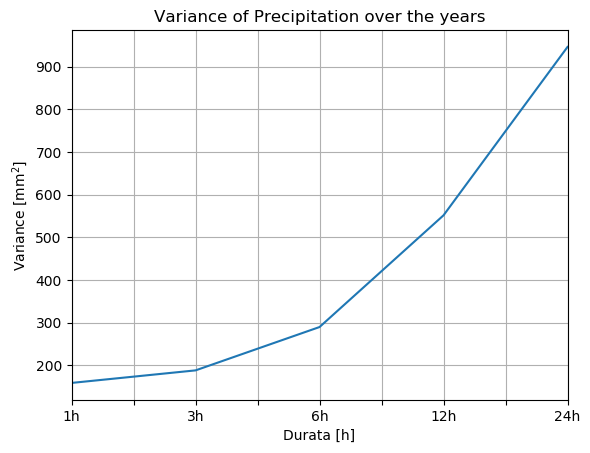

In [13]:
plt.style.use('default')
ax1=variances.plot()
ax1.grid()
ax1.set_title('Variance of Precipitation over the years')
ax1.set_ylabel("Variance [mm$^2$]")
ax1.set_xlabel('Durata [h]')

In [14]:
std=data.std()
std

1h     12.599200
3h     13.716056
6h     17.022101
12h    23.487687
24h    30.763354
dtype: float64

Text(0.5, 0, 'Durata [h]')

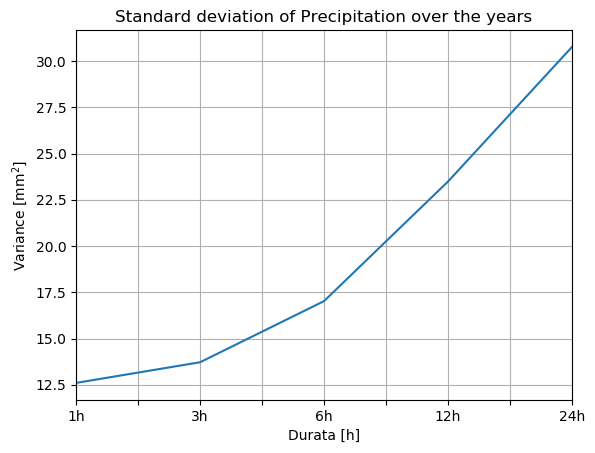

In [15]:
ax2=std.plot()
ax2.grid()
ax2.set_title('Standard deviation of Precipitation over the years')
ax2.set_ylabel("Variance [mm$^2$]")
ax2.set_xlabel('Durata [h]')

In [16]:
data.std()

1h     12.599200
3h     13.716056
6h     17.022101
12h    23.487687
24h    30.763354
dtype: float64

In [17]:
data.mean()

1h     36.912000
3h     45.360000
6h     55.688889
12h    71.324444
24h    89.528889
dtype: float64

In [18]:
cv = data.std()/data.mean()
cv

1h     0.341331
3h     0.302382
6h     0.305664
12h    0.329308
24h    0.343614
dtype: float64

Text(0.5, 0, 'Durata [h]')

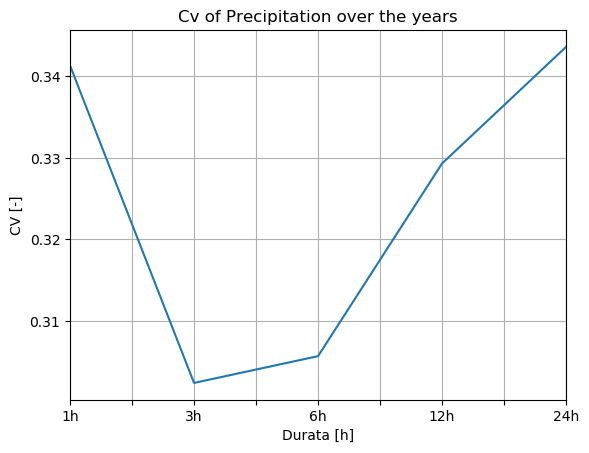

In [19]:
ax3=cv.plot()
ax3.grid()
ax3.set_title('Cv of Precipitation over the years')
ax3.set_ylabel("CV [-]")
ax3.set_xlabel('Durata [h]')

Come si può aggiustare l'estensione (range) degli assi ?

(0, 0.6)

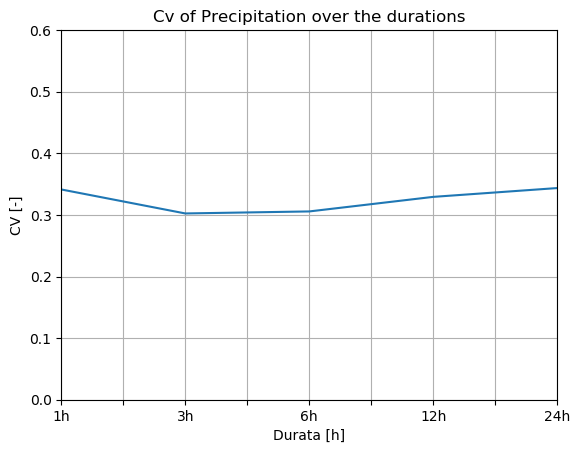

In [20]:
ax3=cv.plot()
ax3.grid()
ax3.set_title('Cv of Precipitation over the durations')
ax3.set_ylabel("CV [-]")
ax3.set_xlabel('Durata [h]')
ax3.set_ylim([0,.6])

## Metodo dei momenti

In [21]:
math.sqrt(6)/math.pi

0.779696801233676

In [22]:
EulerGamma=0.577215664

In [23]:
EulerGamma*math.sqrt(6)/math.pi

0.4500532068427724

Ricordiamo l'espressione della famiglia parametrica di curve di Gumbel:
$$ P[H<h; a,b] = e^{-e-{\frac{h-a}{b}}}$$
È noto inoltre che il valore atteso di $H$, è:
$$ E[H;a,b] = b \gamma + a $$
dove $\gamma = 0.572$ è il numero irrazionale detto di Eulero-Mascheroni.
Il valore della varianza è invece:
$$ Var[H;a,b] = b^2 \frac{\pi^2}{6}$$
Il metodo dei momenti consiste nell'uguagliare media e varianza del campione con media e varianza della popolazione.
quindi
$$ b = \frac{\sqrt{6}}{\pi}\, \sigma_h$$
e
$$a = \mu_h - b \gamma$$

In [24]:
def g(m,s):
    return pd.DataFrame([m-0.4500532*s, 0.77969680*s],index=["a","b"])

In [25]:
abs_m=g(means,std)
abs_m

,1h,3h,6h,12h,24h
a,31.241690,39.187045,48.028038,60.753736,75.683743
b,9.823556,10.694365,13.272078,18.313274,23.986088


In [26]:
abs_m.to_pickle("abs_m")

## Disegnare le curve di Gumbel

In [27]:
from scipy.stats import genextreme,gumbel_r
from numpy import linspace

In [28]:
from statsmodels.distributions.empirical_distribution import ECDF

In [29]:
data.min()

1h     19.6
3h     23.6
6h     31.0
12h    38.2
24h    48.2
dtype: float64

In [30]:
data.min()[0]

19.6

In [31]:
data.max()

1h      89.2
3h     102.0
6h     102.0
12h    129.6
24h    169.4
dtype: float64

In [32]:
data.max()[3]

129.6

In [33]:
data['24h'].max()

169.4

In [34]:
t_rain=np.linspace(data.min()[0],data['24h'].max(),100)

In [35]:
abs_m['1h']["a"]

31.24168950071212

In [36]:
def gumbel(x,abs_d, col):
    return np.exp(-np.exp(-(x-abs_d[col]["a"])/abs_d[col]["b"]))

In [37]:
gumbel(t_rain,abs_m,"1h")

array([0.03797053, 0.06056713, 0.0903812 , 0.12738041, 0.17094376,
       0.21997174, 0.273053  , 0.32864363, 0.38522535, 0.44142398,
       0.49608298, 0.54829629, 0.59740939, 0.64299887, 0.68483991,
       0.72286876, 0.75714551, 0.78782007, 0.8151031 , 0.83924227,
       0.86050376, 0.87915835, 0.89547152, 0.90969666, 0.92207085,
       0.93281248, 0.94212026, 0.9501732 , 0.95713132, 0.96313669,
       0.96831476, 0.97277578, 0.97661633, 0.9799207 , 0.98276225,
       0.98520471, 0.98730334, 0.98910593, 0.99065381, 0.99198266,
       0.99312323, 0.99410202, 0.99494185, 0.99566235, 0.99628042,
       0.99681056, 0.99726524, 0.99765518, 0.99798958, 0.99827633,
       0.99852221, 0.99873304, 0.9989138 , 0.99906879, 0.99920167,
       0.9993156 , 0.99941327, 0.99949701, 0.9995688 , 0.99963034,
       0.9996831 , 0.99972834, 0.99976711, 0.99980035, 0.99982885,
       0.99985328, 0.99987423, 0.99989218, 0.99990757, 0.99992077,
       0.99993208, 0.99994177, 0.99995008, 0.99995721, 0.99996

In [38]:
gb=pd.DataFrame([gumbel(t_rain,abs_m,"1h"),gumbel(t_rain,abs_m,"3h"),gumbel(t_rain,abs_m,"6h"),gumbel(t_rain,abs_m,"12h"),
 gumbel(t_rain,abs_m,"24h")]).T
gb.index=t_rain
gb.columns=["1h","3h","6h","12h","24"]
gb

,1h,3h,6h,12h,24
19.600000,0.037971,0.001943,0.000200,0.000078,0.000032
21.113131,0.060567,0.004428,0.000501,0.000165,0.000060
22.626263,0.090381,0.009053,0.001137,0.000329,0.000108
24.139394,0.127380,0.016841,0.002360,0.000621,0.000189
25.652525,0.170944,0.028865,0.004529,0.001115,0.000319
...,...,...,...,...,...
163.347475,0.999999,0.999991,0.999832,0.996317,0.974464
164.860606,0.999999,0.999992,0.999850,0.996608,0.976007
166.373737,0.999999,0.999993,0.999866,0.996877,0.977457
167.886869,0.999999,0.999994,0.999880,0.997124,0.978820


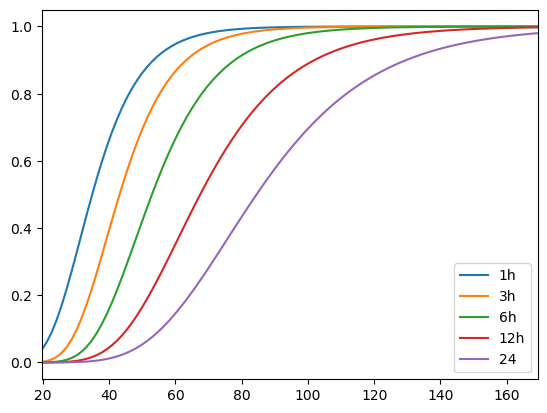

In [39]:
gb.plot()

Text(0, 0.5, 'P[H < h]')

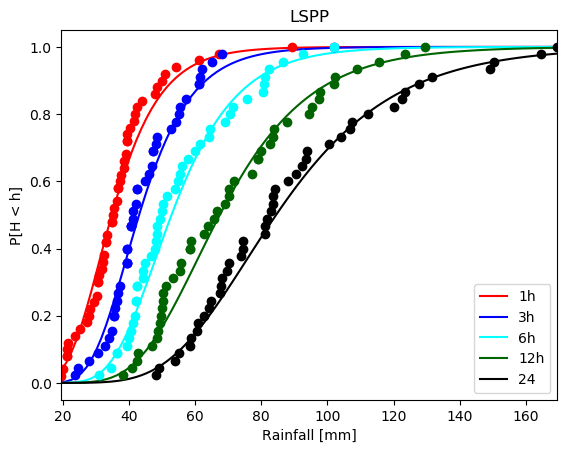

In [40]:
plt.rc("xtick",labelsize=10)
plt.rc("ytick",labelsize=10)
ax=gb.plot(color=["red","blue","cyan","darkgreen","black"])
ecdf1h=ECDF(data["1h"])
ax.plot(data["1h"],ecdf1h(data["1h"]),"o",c="red",label="1h")
data3h=data["3h"].dropna()
ecdf3h=ECDF(data3h)
ax.plot(data3h,ecdf3h(data3h),"o",c="blue",label="3h")
data6h=data["6h"].dropna()
ecdf6h=ECDF(data6h)
ax.plot(data6h,ecdf6h(data6h),"o",c="cyan",label="6h")
data12h=data["12h"].dropna()
ecdf12h=ECDF(data12h)
ax.plot(data12h,ecdf12h(data12h),"o",c="darkgreen",label="12h")
data24h=data["24h"].dropna()
ecdf24h=ECDF(data24h)
ax.plot(data24h,ecdf24h(data24h),"o",c="black",label="6h")
ax.set_title("LSPP")
ax.set_xlabel("Rainfall [mm]")
ax.set_ylabel("P[H < h]")

Provate a disegnare meglio queste curve cambiano i simboli dei valori misurati. 

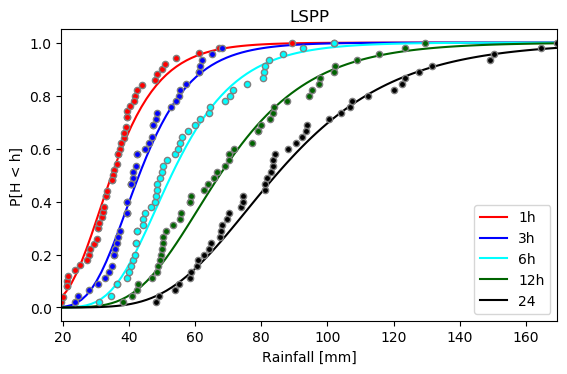

In [43]:
plt.rc("xtick",labelsize=10)
plt.rc("ytick",labelsize=10)
ax=gb.plot(color=["red","blue","cyan","darkgreen","black"])
ecdf1h=ECDF(data["1h"])
ax.plot(data["1h"],ecdf1h(data["1h"]),"o",c="red",label="1h",markeredgecolor='gray',markersize=4.5)
data3h=data["3h"].dropna()
ecdf3h=ECDF(data3h)
ax.plot(data3h,ecdf3h(data3h),"o",c="blue",label="3h",markeredgecolor='gray',markersize=4.5)
data6h=data["6h"].dropna()
ecdf6h=ECDF(data6h)
ax.plot(data6h,ecdf6h(data6h),"o",c="cyan",label="6h",markeredgecolor='gray',markersize=4.5)
data12h=data["12h"].dropna()
ecdf12h=ECDF(data12h)
ax.plot(data12h,ecdf12h(data12h),"o",c="darkgreen",label="12h",markeredgecolor='gray',markersize=4.5)
data24h=data["24h"].dropna()
ecdf24h=ECDF(data24h)
ax.plot(data24h,ecdf24h(data24h),"o",c="black",label="6h",markeredgecolor='gray',markersize=4.5)
ax.set_title("LSPP")
ax.set_xlabel("Rainfall [mm]")
ax.set_ylabel("P[H < h]")
ax.set_aspect(80)

In [44]:
figS=ax.get_figure()
figS.savefig("LSPP.png",dpi=300)